In [63]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_transactions = pd.read_csv('creditcard.csv')
dataset_transactions.shape


(284807, 31)

In [84]:
dataset_transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_cat
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,150
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,10
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,400
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,150
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,100


In [65]:
dataset_transactions.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [66]:
dataset_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [67]:
dataset_transactions.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [68]:
dataset_transactions.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [69]:
dataset_transactions.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

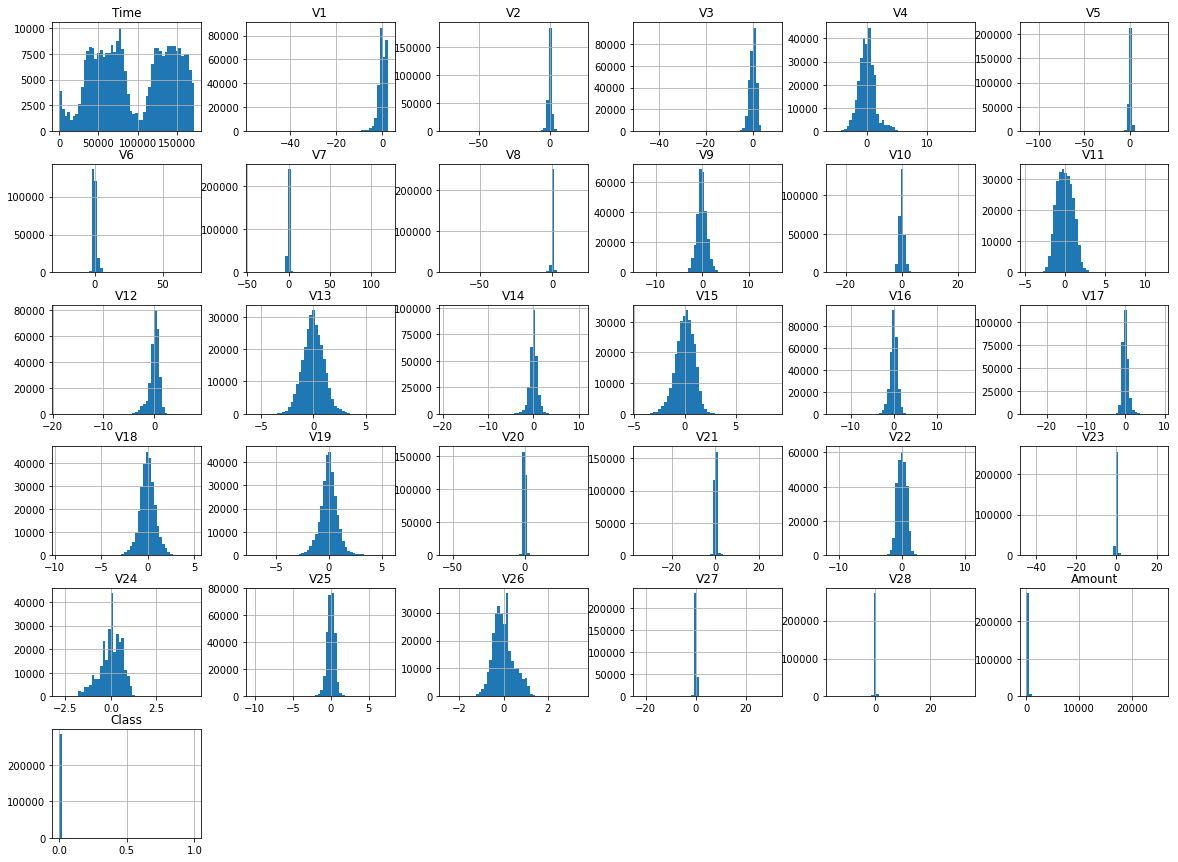

In [70]:
dataset_transactions.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

In [71]:
from sklearn.model_selection import train_test_split
x_data = dataset_transactions.drop('Class', axis=1)
y = dataset_transactions['Class']
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [72]:
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
68806,0.307595,0.939351,0.778185,0.851289,0.204924,0.765936,0.271600,0.261613,0.750725,0.515828,...,0.573399,0.610169,0.484858,0.665926,0.277811,0.583849,0.355069,0.420751,0.311691,0.000504
40018,0.231839,0.979164,0.765794,0.845624,0.244555,0.762663,0.261108,0.263191,0.785907,0.467222,...,0.580611,0.558704,0.483220,0.665981,0.341300,0.582022,0.557818,0.415234,0.313162,0.000995
250360,0.896251,0.991017,0.765163,0.832445,0.322717,0.762425,0.259889,0.263508,0.785766,0.507608,...,0.576483,0.552961,0.451658,0.672200,0.365993,0.557614,0.245881,0.417485,0.312462,0.000269
234820,0.857273,0.993057,0.769328,0.807874,0.275426,0.766911,0.248511,0.266911,0.781462,0.483550,...,0.577963,0.564721,0.545356,0.665232,0.371546,0.591087,0.409416,0.416511,0.312481,0.000177
10001,0.086891,0.944073,0.778176,0.877843,0.389518,0.767259,0.268058,0.267270,0.783652,0.476891,...,0.578833,0.555614,0.488661,0.667871,0.413788,0.554402,0.413348,0.409955,0.309682,0.000148


<AxesSubplot:>

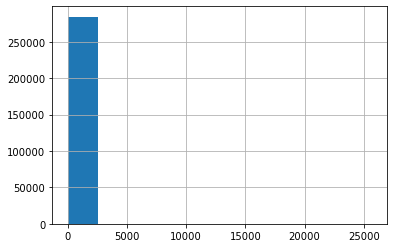

In [73]:
dataset_transactions["Amount"].hist()

In [74]:
dataset_transactions["Amount_cat"] = pd.cut(dataset_transactions["Amount"],
                               bins=[0., 1., 10., 50., 100., 150., 200., 250., 400,np.inf],
                               labels=[1, 10, 50, 100, 150, 200, 250, 400, 500])
dataset_transactions["Amount_cat"].value_counts()


50     90781
10     69772
100    37254
1      28667
150    17091
500    12524
200    10580
400    10111
250     6202
Name: Amount_cat, dtype: int64

<AxesSubplot:>

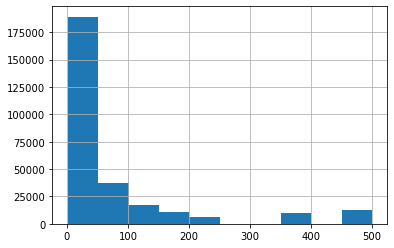

In [75]:
dataset_transactions["Amount_cat"].hist()

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)
print("Logistic regression accuracy {:f}%".format(acc))

In [79]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)
print("Logistic regression accuracy {:f}%".format(acc))

Logistic regression accuracy 0.999052%


<AxesSubplot:title={'center':'Logistic Regression Confusion Matrix'}>

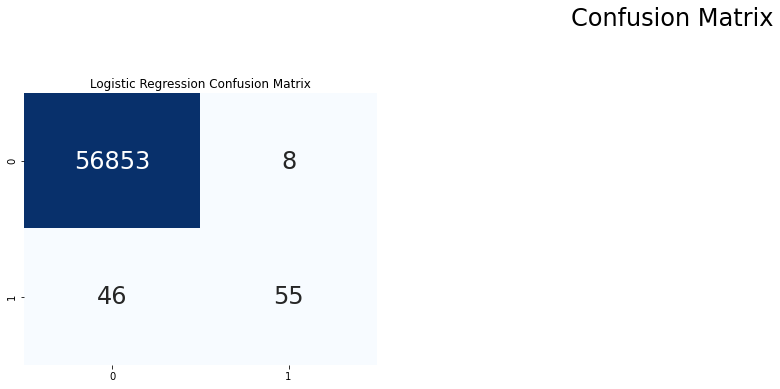

In [80]:
from sklearn.metrics import confusion_matrix
#lr.predict(x_test)
y_head_lr = lr.predict(x_test)
y_head_lr
cm_lr = confusion_matrix(y_test,y_head_lr)

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrix",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [81]:
##Cross-Validation

In [82]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [83]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, x_train, y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)

scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

Cross-Validation Accuracy Scores [0.99888082 0.99901249 0.99910027 0.99918804 0.99892471]


(0.9988808181000242, 0.9990212644560994, 0.999188044503939)

In [85]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
68806,0.307595,0.939351,0.778185,0.851289,0.204924,0.765936,0.271600,0.261613,0.750725,0.515828,...,0.573399,0.610169,0.484858,0.665926,0.277811,0.583849,0.355069,0.420751,0.311691,0.000504
40018,0.231839,0.979164,0.765794,0.845624,0.244555,0.762663,0.261108,0.263191,0.785907,0.467222,...,0.580611,0.558704,0.483220,0.665981,0.341300,0.582022,0.557818,0.415234,0.313162,0.000995
250360,0.896251,0.991017,0.765163,0.832445,0.322717,0.762425,0.259889,0.263508,0.785766,0.507608,...,0.576483,0.552961,0.451658,0.672200,0.365993,0.557614,0.245881,0.417485,0.312462,0.000269
234820,0.857273,0.993057,0.769328,0.807874,0.275426,0.766911,0.248511,0.266911,0.781462,0.483550,...,0.577963,0.564721,0.545356,0.665232,0.371546,0.591087,0.409416,0.416511,0.312481,0.000177
10001,0.086891,0.944073,0.778176,0.877843,0.389518,0.767259,0.268058,0.267270,0.783652,0.476891,...,0.578833,0.555614,0.488661,0.667871,0.413788,0.554402,0.413348,0.409955,0.309682,0.000148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,0.801304,0.935835,0.779273,0.821110,0.258764,0.766455,0.257602,0.268341,0.790897,0.445768,...,0.575613,0.561274,0.498951,0.665563,0.278767,0.555613,0.477128,0.407963,0.312909,0.001942
86293,0.353992,0.947628,0.776952,0.863033,0.261380,0.772002,0.275703,0.268431,0.789722,0.430408,...,0.581205,0.560652,0.509833,0.666778,0.252255,0.548589,0.473919,0.419205,0.315364,0.000973
122579,0.443400,0.983991,0.757240,0.833618,0.179281,0.759951,0.258335,0.261279,0.783931,0.384088,...,0.577294,0.552471,0.445783,0.666628,0.304145,0.594626,0.344531,0.416485,0.313198,0.001358
152315,0.562833,0.988854,0.749323,0.834950,0.224467,0.755145,0.263857,0.256205,0.787276,0.523254,...,0.581821,0.564412,0.526422,0.667151,0.305941,0.544440,0.377236,0.415890,0.312465,0.006668


In [86]:
#Discover and vizualize data

<AxesSubplot:xlabel='Time', ylabel='Class'>

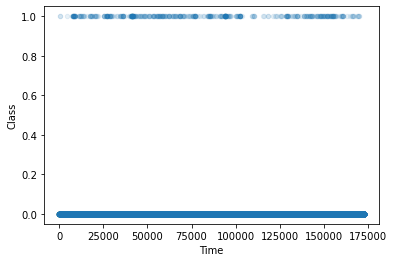

In [93]:

#.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
dataset_transactions.plot(kind="scatter", x="Time", y="Class", alpha=0.1)
#save_fig("transactions_plot")

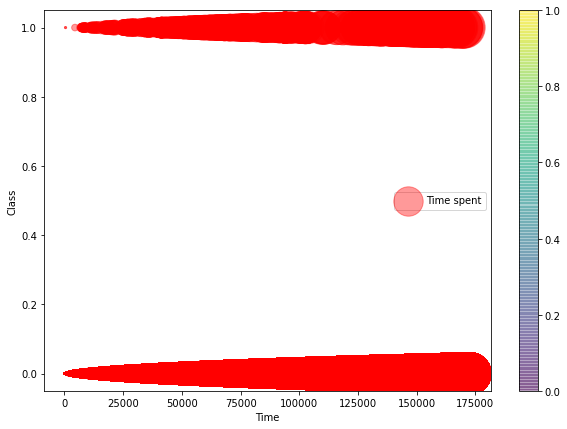

In [99]:
dataset_transactions.plot(kind="scatter", x="Time", y="Class", alpha=0.4,
             s=dataset_transactions["Time"]/100, label="Time spent", figsize=(10,7),
             c="red", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
